## Refer to the data given at the link with the name Mediclaim and perform following tasks, the metadata is also provided for your help.You are being provided with a meta data also please read it before doing implementation
1. Perform the feature engineering on the data.
2. Extract X and y values.
3. Use OLS to fit the data.
4. Analyse the results.

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sn
import matplotlib.pyplot as mp
import statsmodels.api as sm
import warnings
warnings.simplefilter("ignore") 

In [59]:
from sklearn.compose import ColumnTransformer as CT
from sklearn.pipeline import Pipeline as PP
from sklearn.preprocessing import StandardScaler as SS,OneHotEncoder as OHE
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import GridSearchCV as GSCV, train_test_split as TTS

In [3]:
t=pd.read_csv("mediclaim.csv")

In [4]:
t.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
t.shape

(1338, 7)

In [6]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
t.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
t.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
t.duplicated().sum()

1

In [10]:
t.drop_duplicates(inplace=True)

In [11]:
t.shape

(1337, 7)

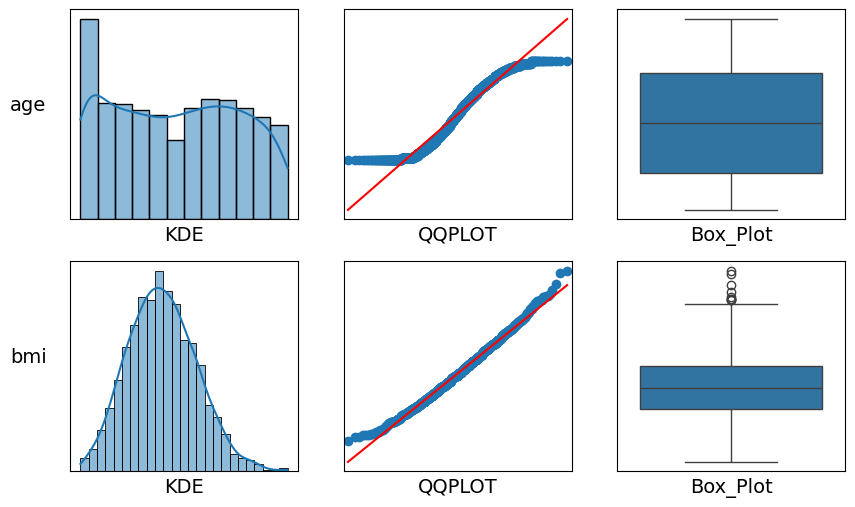

In [13]:
col=["age","bmi"]

fig,ax=mp.subplots(len(col),3,figsize=(10,6))

for i in range(len(col)):
    
    sn.histplot(t[col[i]],ax=ax[i,0],kde=True) 
    ax[i,0].set_ylabel(col[i],fontsize=14,rotation=0,labelpad=30)
    ax[i,0].set_xlabel("KDE",fontsize=14)
    ax[i,0].set_title("")
    ax[i,0].set_xticks([])
    ax[i,0].set_yticks([])
    
    sm.qqplot(t[col[i]],line="s",ax=ax[i,1])
    ax[i,1].set_xlabel("QQPLOT",fontsize=14)
    ax[i,1].set_ylabel("")
    ax[i,1].set_title("")
    ax[i,1].set_xticks([])
    ax[i,1].set_yticks([])
    
    sn.boxplot(t[col[i]],ax=ax[i,2])
    ax[i,2].set_xlabel("Box_Plot",fontsize=14)
    ax[i,2].set_ylabel("")
    ax[i,2].set_title("")
    ax[i,2].set_xticks([])
    ax[i,2].set_yticks([])
    

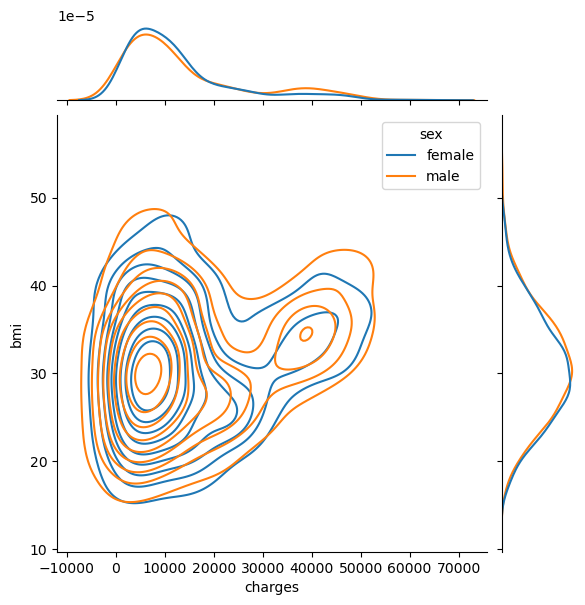

In [14]:
sn.jointplot(data=t,x="charges",y="bmi",kind="kde",hue="sex");

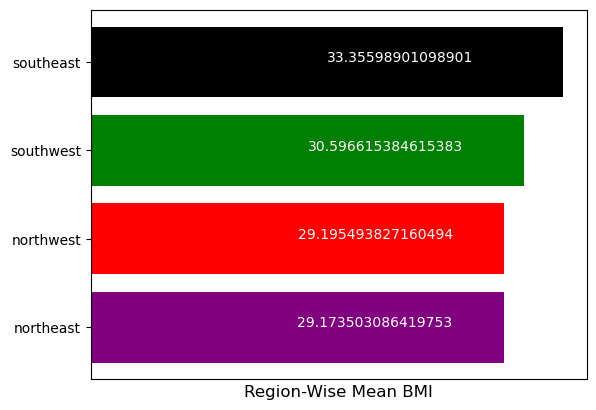

In [15]:
ind=t.groupby("region")["bmi"].mean().sort_values(ascending=True).index
value=t.groupby("region")["bmi"].mean().sort_values(ascending=True).values
mp.barh(ind,value,color=["purple","red","green","black"])
for i, v in enumerate(value):
    mp.text(v/2, i, str(v),color="white")
mp.xlabel("Region-Wise Mean BMI",fontsize=12)
mp.xticks([]);

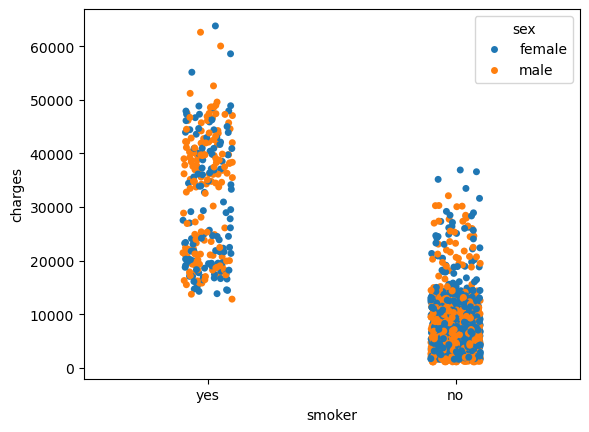

In [16]:
sn.stripplot(data=t,x="smoker",y="charges",hue="sex");

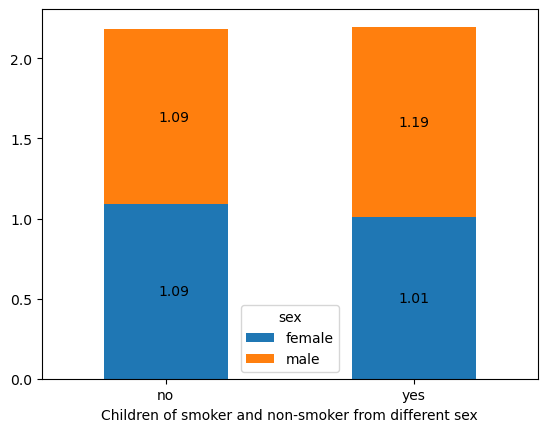

In [17]:
t.groupby(["smoker","sex"])["children"].mean().unstack().plot(kind="bar",rot=0,stacked=True)
grouped_data = t.groupby(["smoker","sex"])["children"].mean().unstack()
cumulative_sums = grouped_data.cumsum(axis=1)
for i, row in grouped_data.iterrows():
    for col in grouped_data.columns:
        value = row[col]
        if i=="no":
            x_pos=1/30
        else:
            x_pos = 2/2
        y_pos = (cumulative_sums[col][i] - grouped_data[col][i] / 2)
        mp.text(x_pos, y_pos,f"{value:.2f}", ha='center', va='center')
mp.xlabel("Children of smoker and non-smoker from different sex");

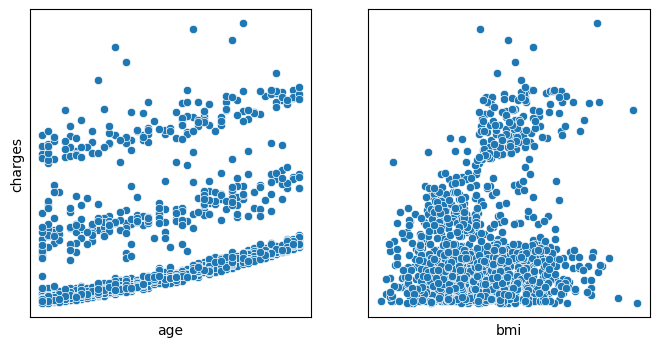

In [46]:
x=["age","bmi"]
y="charges"
fig,ax=mp.subplots(1,len(x),figsize=(8,4))
for i in range(len(x)):
    sn.scatterplot(data=t,x=x[i],y=y,ax=ax[i])
    ax[i].set_xticks([])
    ax[i].set_yticks([])
ax[len(x)-1].set_ylabel("",labelpad=30);

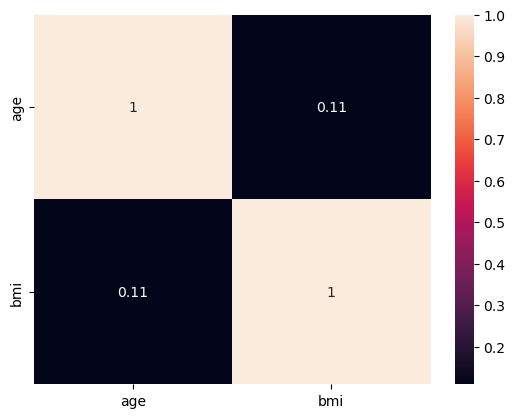

In [52]:
u=["age","bmi"]
k=t[u].corr()
sn.heatmap(k,annot=True);

In [56]:
ct=CT([
    ("OHE",OHE(drop="first"),["smoker","region","sex"])
],remainder="passthrough")

In [58]:
pp=PP(
[
    ("CT",ct),
    ("SS",SS(),[0,2]),
    ("LR",LR())
])

In [24]:
t.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
